In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('C:/Users/ACER/Documents/a1/advertising.csv')

data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


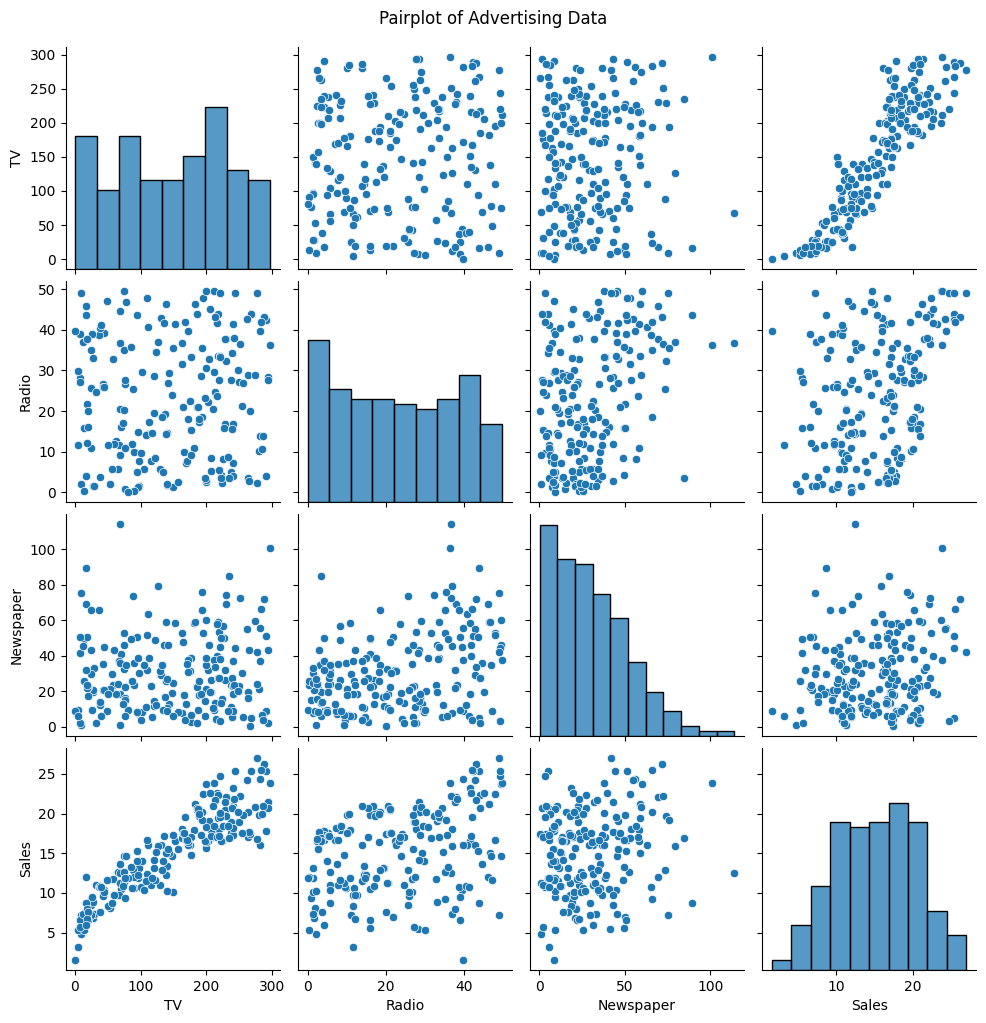

In [10]:
sns.pairplot(data)
plt.suptitle('Pairplot of Advertising Data', y=1.02)
plt.show()

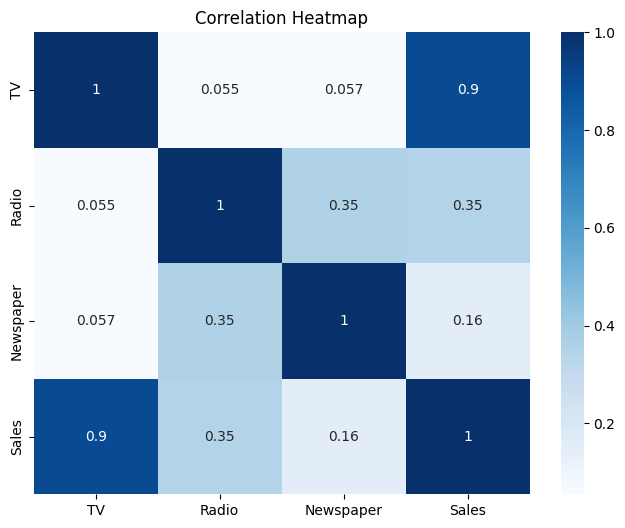

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

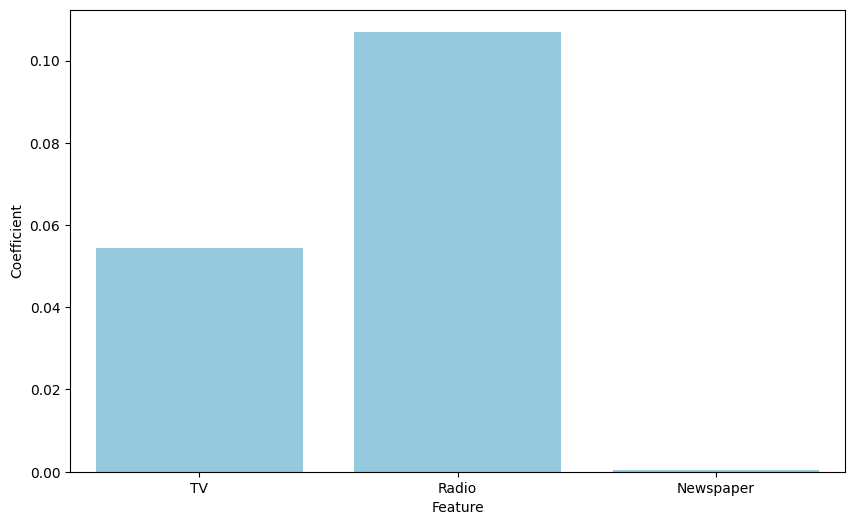

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients of the model
coefficients = model.coef_
feature_names = X.columns

# Create a DataFrame for plotting
feature_importances = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Coefficient', data=feature_importances, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()


In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='linear')
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

results = {}
for name, model in models.items():
    mse, mae, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {'MSE': mse, 'MAE': mae, 'R^2': r2}

results_df = pd.DataFrame(results).T
print(results_df)

best_model_name = results_df['R^2'].idxmax()
best_model = models[best_model_name]
print(f'Best Model: {best_model_name}')

def predict_sales(tv, radio, newspaper, model):

    input_data = pd.DataFrame({'TV': [tv], 'Radio': [radio], 'Newspaper': [newspaper]})
    prediction = model.predict(input_data)
    return prediction[0]

def interactive_prediction(model):
    tv_expenditure = float(input("Enter TV advertising expenditure: "))
    radio_expenditure = float(input("Enter Radio advertising expenditure: "))
    newspaper_expenditure = float(input("Enter Newspaper advertising expenditure: "))
    
    predicted_sales = predict_sales(tv_expenditure, radio_expenditure, newspaper_expenditure, model)
    print(f'Predicted Sales: {predicted_sales}')

interactive_prediction(best_model)


                                MSE       MAE       R^2
Linear Regression          2.541624  1.159488  0.909148
Ridge Regression           2.541645  1.159490  0.909148
Lasso Regression           2.539776  1.158671  0.909214
Decision Tree              3.064667  1.423333  0.890452
Random Forest              1.672728  1.018017  0.940208
Gradient Boosting          1.781326  1.039700  0.936326
Support Vector Regression  2.497777  1.149930  0.910716
Best Model: Random Forest
Predicted Sales: 17.410000000000004
